# 데이터 전처리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import warnings

warnings.filterwarnings('ignore')
cust_df = pd.read_csv('./santander-customer-satisfaction/train_santander.csv',encoding='latin-1')
print('dataset shape:',cust_df.shape)
cust_df.head()

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [3]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [6]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET']==1].TARGET.count() # 특정 컬럼만 agg를 위해 필터 필요
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt/total_cnt)))

TARGET
0    73012
1     3008
Name: count, dtype: int64
unsatisfied 비율은 0.04


In [7]:
cust_df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [10]:
print(cust_df.var3.value_counts())

var3
 2         74165
 8           138
-999999      116
 9           110
 3           108
           ...  
 231           1
 188           1
 168           1
 135           1
 87            1
Name: count, Length: 208, dtype: int64


In [11]:
cust_df['var3'].replace(-999999,2,inplace=True)
cust_df.drop('ID',axis=1,inplace=True)

X_features = cust_df.iloc[:,:-1]
y_labels = cust_df.iloc[:,-1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_features,y_labels,test_size=0.2,random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 shape : {0}, 테스트 세트 Shape : {1}'.format(X_train.shape,X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt) # value_counts()는 시리즈형태
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 shape : (60816, 369), 테스트 세트 Shape : (15204, 369)
학습 세트 레이블 값 분포 비율
TARGET
0    0.960964
1    0.039036
Name: count, dtype: float64

 테스트 세트 레이블 값 분포 비율
TARGET
0    0.9583
1    0.0417
Name: count, dtype: float64


In [16]:
X_tr,X_val,y_tr,y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=0)

# XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [17]:
# 비교를 위해 튜닝 없는 버전
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score # 레이블이 한쪽에 편중되어 있기 때문에 평가지수로 roc_auc_score가 쓰인다

xgb_clf = XGBClassifier(n_estimators= 500,
                        learning_ratt = 0.05,
                        random_state=156)

xgb_clf.fit(X_tr,y_tr,
            early_stopping_rounds=100,
            eval_metric='auc',
            eval_set=[(X_tr,y_tr),(X_val,y_val)])

xgb_roc_score = roc_auc_score(y_test,xgb_clf.predict_proba(X_test)[:,1])
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.83633	validation_1-auc:0.81797
[1]	validation_0-auc:0.84346	validation_1-auc:0.82225
[2]	validation_0-auc:0.85159	validation_1-auc:0.82629
[3]	validation_0-auc:0.85658	validation_1-auc:0.82733
[4]	validation_0-auc:0.85994	validation_1-auc:0.82893
[5]	validation_0-auc:0.86367	validation_1-auc:0.83023
[6]	validation_0-auc:0.86655	validation_1-auc:0.83147
[7]	validation_0-auc:0.87043	validation_1-auc:0.83176
[8]	validation_0-auc:0.87448	validation_1-auc:0.83279
[9]	validation_0-auc:0.87701	validation_1-auc:0.83323
[10]	validation_0-auc:0.87984	validation_1-auc:0.83297
[11]	validation_0-auc:0.88166	validation_1-auc:0.83371
[12]	validation_0-auc:0.88303	validation_1-auc:0.83467
[13]	validation_0-auc:0.88459	validation_1-auc:0.83525
[14]	validation_0-auc:0.88583	validation_1-auc:0.83497
[15]	validation_0-auc:0.88657	validation_1-auc:0.83509
[16]	validation_0-auc:0.88853	validation_1-auc:0.83571
[17]	validation_0-auc:0.89001	validation_1-auc:0.83583
[18]	validation_0-au

In [21]:
from hyperopt import hp

xgb_search_space = {'max_depth':hp.quniform('max_depth',5,15,1),
                    'min_child_weight':hp.quniform('min_child_weight',1,6,1),
                    'colsample_bytree':hp.uniform('colsample_bytree',0.5,0.95),
                    'learning_rate':hp.uniform('learning_rate',0.01,0.2)}

In [22]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

def objectve_func(search_space):
    xgb_clf = XGBClassifier(n_estimaotr=100,
                            max_depth = int(search_space['max_depth']),
                            min_child_weight = int(search_space['min_child_weight']),
                            colsample_bytree = search_space['colsample_bytree'],
                            learning_rate = search_space['learning_rate'])
    
    roc_auc_list = []

    kf = KFold(n_splits = 3)

    # X_train을 다시 학습과 검증용 데이터로 분리 
    for tr_index, val_index in kf.split(X_train):
        # kf.split(X_train)으로 추출된 학습과 검증 index 값으로 학습과 검증 데이터 세트 분리 
        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index ]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]
        # early stopping은 30회로 설정하고 추출된 학습과 검증 데이터로 XGBClassifier 학습 수행. 
        xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric="auc",
                    eval_set=[(X_tr, y_tr), (X_val, y_val)])
        #1로 예측한 확률값 추출 후 roc auc 계산하고 평균 roc auc 계산을 위해 list에 결과값 담음. 
        score = roc_auc_score(y_val, xgb_clf.predict_proba(X_val)[:, 1]) 
        roc_auc_list.append(score)
        # 3개 k-fold로 계산된 roc_auc 값의 평균값을 반환하되,
        # HyperOpt는 목적함수의 최솟값을 위한 입력값을 찾으므로 -1을 곱한 뒤 반환. 
    return -1*np.mean(roc_auc_list)


In [23]:
from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(fn = objectve_func,
            space = xgb_search_space,
            algo= tpe.suggest,
            max_evals=50,
            trials = trials,
            rstate = np.random.default_rng(seed=50))

print('best:',best)

  0%|          | 0/50 [00:00<?, ?trial/s, best loss=?]

[0]	validation_0-auc:0.80681	validation_1-auc:0.73725 
[1]	validation_0-auc:0.86502	validation_1-auc:0.80955 
[2]	validation_0-auc:0.86452	validation_1-auc:0.79985 
[3]	validation_0-auc:0.87613	validation_1-auc:0.81110 
[4]	validation_0-auc:0.88148	validation_1-auc:0.81999 
[5]	validation_0-auc:0.88504	validation_1-auc:0.82259 
[6]	validation_0-auc:0.88512	validation_1-auc:0.82657 
[7]	validation_0-auc:0.88644	validation_1-auc:0.82752 
[8]	validation_0-auc:0.88801	validation_1-auc:0.82873 
[9]	validation_0-auc:0.88834	validation_1-auc:0.82989 
[10]	validation_0-auc:0.89043	validation_1-auc:0.83020
[11]	validation_0-auc:0.89236	validation_1-auc:0.83048
[12]	validation_0-auc:0.89256	validation_1-auc:0.83133
[13]	validation_0-auc:0.89402	validation_1-auc:0.83046
[14]	validation_0-auc:0.89512	validation_1-auc:0.83088
[15]	validation_0-auc:0.89595	validation_1-auc:0.83038
[16]	validation_0-auc:0.89665	validation_1-auc:0.83062
[17]	validation_0-auc:0.89700	validation_1-auc:0.83017
[18]	valid

In [27]:
# n_estimators를 500 증가 후 최적으로 찾은 하이퍼 파라미터를 기반으로 학습과 예측 수행. 
xgb_clf = XGBClassifier(n_estimators=500, 
                        learning_rate=round(best['learning_rate'], 5),
                        max_depth=int(best['max_depth']),
                        min_child_weight=int(best['min_child_weight']),
                        colsample_bytree=round(best['colsample_bytree'],5))
# evaluation metric을 auc로, early stopping은 100으로 설정하고 학습 
xgb_clf.fit(X_tr, y_tr, early_stopping_rounds=100,
            eval_metric="auc", 
            eval_set=[(X_tr, y_tr), (X_val, y_val)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1]) 
print('ROC AUC: {0:4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.75865	validation_1-auc:0.73452
[1]	validation_0-auc:0.76596	validation_1-auc:0.73486
[2]	validation_0-auc:0.77335	validation_1-auc:0.73974
[3]	validation_0-auc:0.81409	validation_1-auc:0.78210
[4]	validation_0-auc:0.82651	validation_1-auc:0.79617
[5]	validation_0-auc:0.83616	validation_1-auc:0.80994
[6]	validation_0-auc:0.84144	validation_1-auc:0.81927
[7]	validation_0-auc:0.84415	validation_1-auc:0.82275
[8]	validation_0-auc:0.84279	validation_1-auc:0.82064
[9]	validation_0-auc:0.84638	validation_1-auc:0.82473
[10]	validation_0-auc:0.84869	validation_1-auc:0.82674
[11]	validation_0-auc:0.85030	validation_1-auc:0.82963
[12]	validation_0-auc:0.84939	validation_1-auc:0.82868
[13]	validation_0-auc:0.85096	validation_1-auc:0.83073
[14]	validation_0-auc:0.85247	validation_1-auc:0.83124
[15]	validation_0-auc:0.85224	validation_1-auc:0.82950
[16]	validation_0-auc:0.85240	validation_1-auc:0.82973
[17]	validation_0-auc:0.85408	validation_1-auc:0.83136
[18]	validation_0-au

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


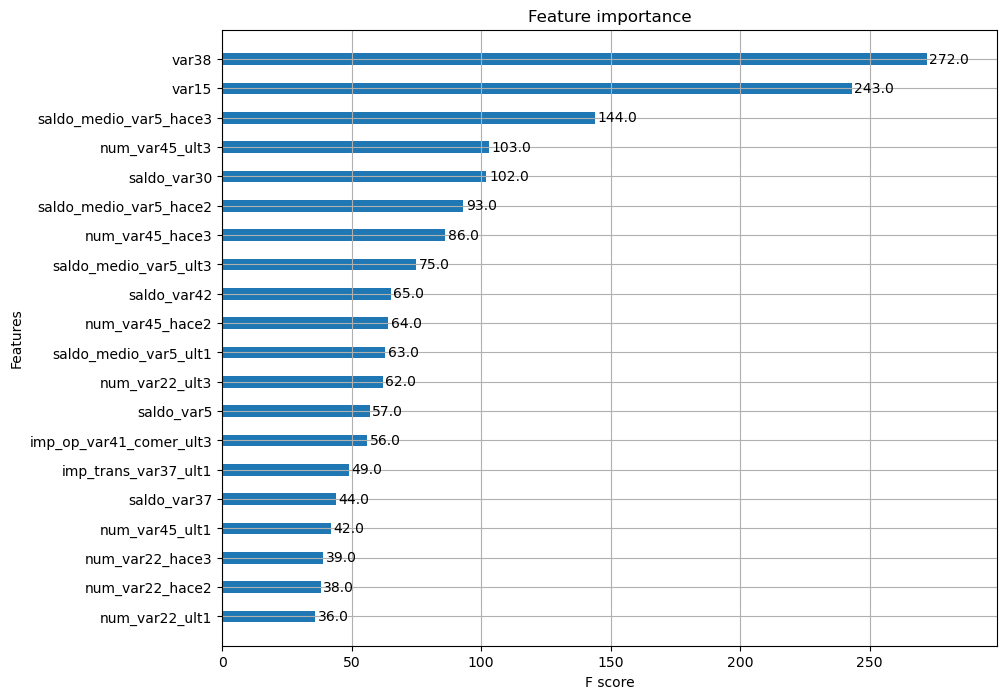

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig,axes = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf,ax=axes, max_num_features=20, height = 0.4)

# LightGBM 모델 학습과 하이퍼 파라미터 튜닝

https://colab.research.google.com/drive/1Edsf7YAGY6LDjG53LU_dF8v0J9aqpG9A#scrollTo=54cHCmjaV6yi